In [1]:
import numpy as np
import random
import os
import pandas as pd

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [2]:
train = pd.read_csv('C:/Users/hjn/Desktop/소득예측/income-forcast/train.csv', index_col=None)
test = pd.read_csv('C:/Users/hjn/Desktop/소득예측/income-forcast/test.csv')

display(train.head(3))
display(test.head(3))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median


In [22]:
print(train.columns)

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')


In [23]:
train.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

# eda

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

<Axes: xlabel='Income', ylabel='Count'>

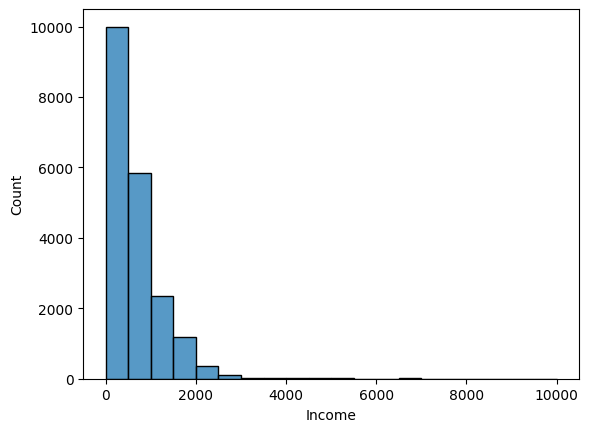

In [ ]:
sns.histplot(x= 'Income', data = train, bins = 20)

## income vs age

<Axes: xlabel='Age', ylabel='Income'>

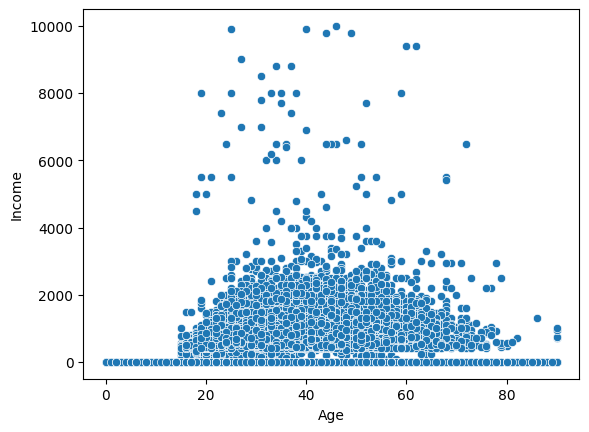

In [6]:
sns.scatterplot(x='Age', y='Income', data = train)

In [8]:
# 약한 상관관계가 있다.
spst.pearsonr(train['Age'], train['Income'])

PearsonRResult(statistic=0.12479478557328477, pvalue=3.108910269931984e-70)

## income vs gender

<Axes: xlabel='Gender', ylabel='Income'>

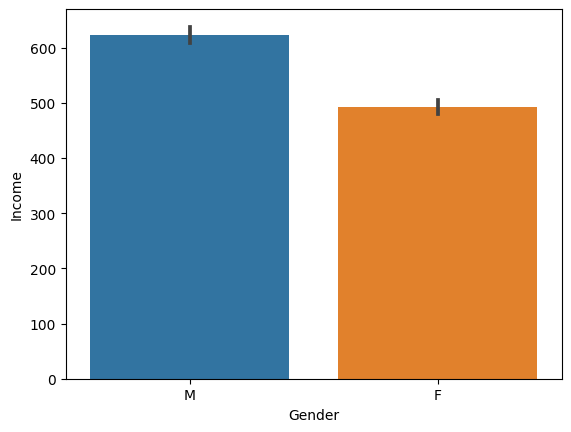

In [10]:
sns.barplot(x='Gender', y='Income', data = train)

In [16]:
# 두 그룹으로 데이터 저장
male = train.loc[train['Gender']=='M', 'Income']
female = train.loc[train['Gender']=='F', 'Income']

spst.ttest_ind(male, female)

TtestResult(statistic=13.336700631450782, pvalue=2.107161980488648e-40, df=19998.0)

In [ ]:
# 의미가 있음 -> label encoder로 한 열로 쓰기

## Education_Status vs income

<Axes: xlabel='Education_Status', ylabel='Income'>

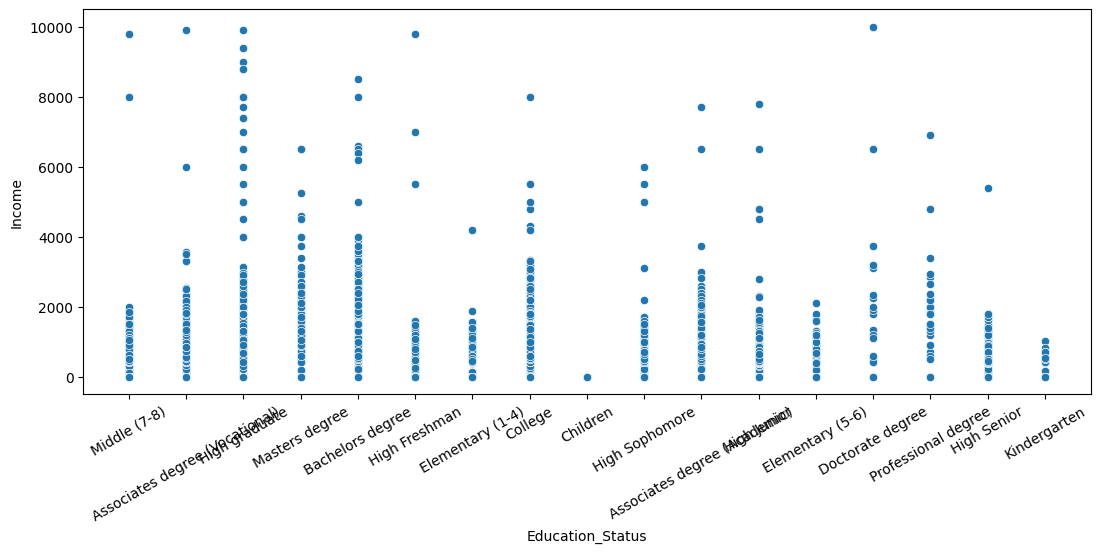

In [19]:
plt.figure(figsize=(13,5))
plt.xticks(rotation = 30)
sns.scatterplot(x='Education_Status', y='Income', data = train)

<Axes: xlabel='Education_Status', ylabel='Income'>

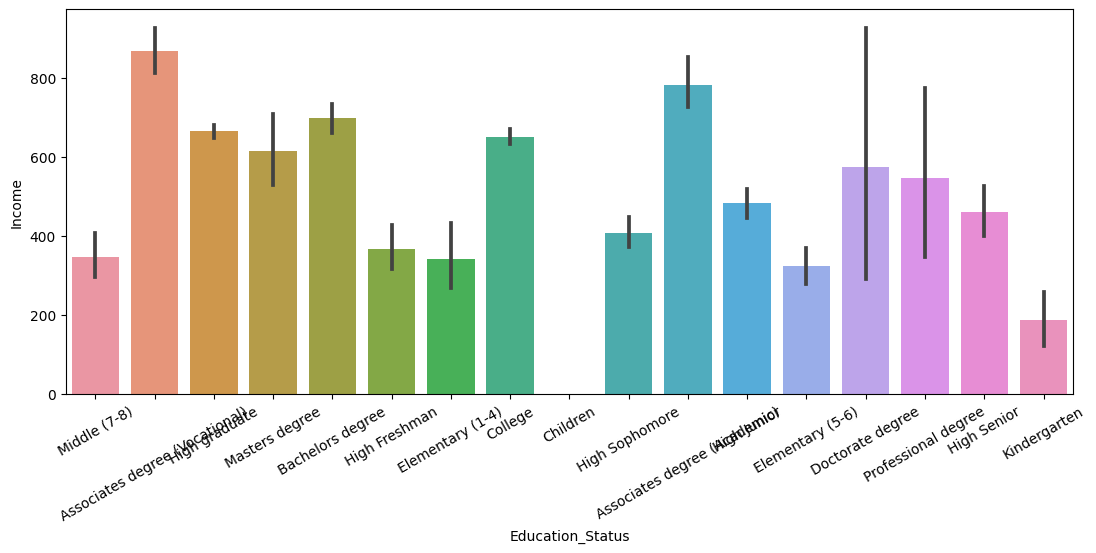

In [21]:
plt.figure(figsize=(13,5))
plt.xticks(rotation = 30)
sns.barplot(x='Education_Status', y='Income', data = train)

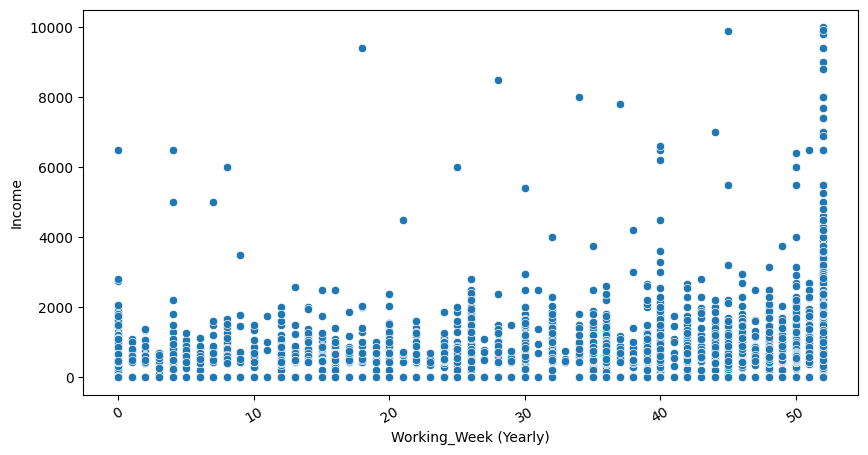

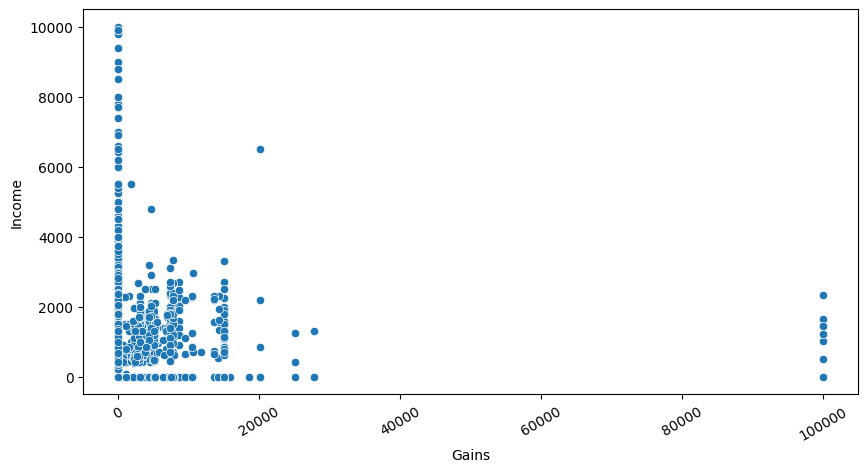

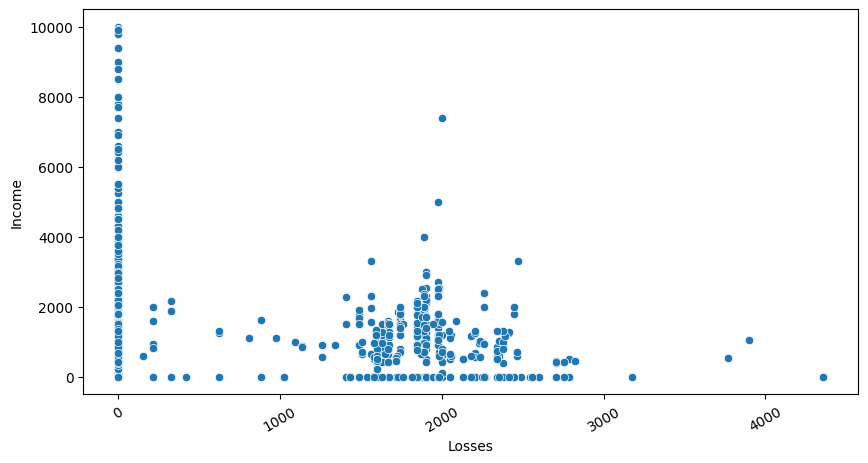

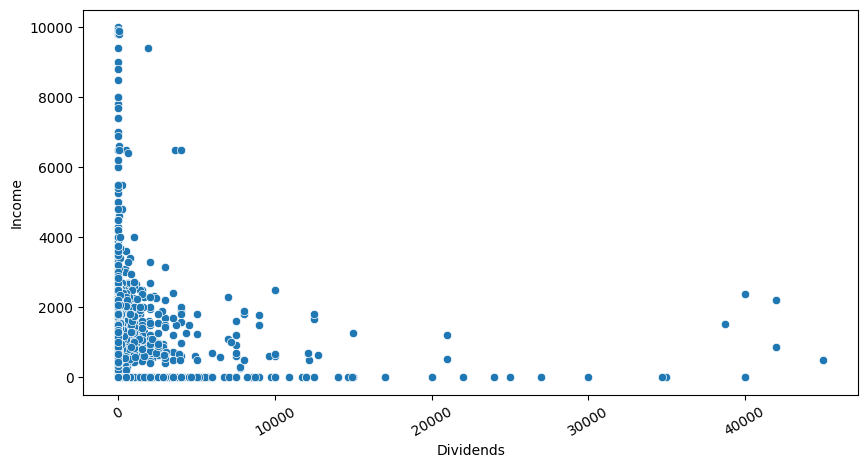

In [137]:
for i in ['Working_Week (Yearly)', 'Gains',	'Losses',	'Dividends']:
  plt.figure(figsize=(10,5))
  plt.xticks(rotation = 30)
  sns.scatterplot(x=i, y='Income', data = train)

<Axes: xlabel='Household_Status', ylabel='Income'>

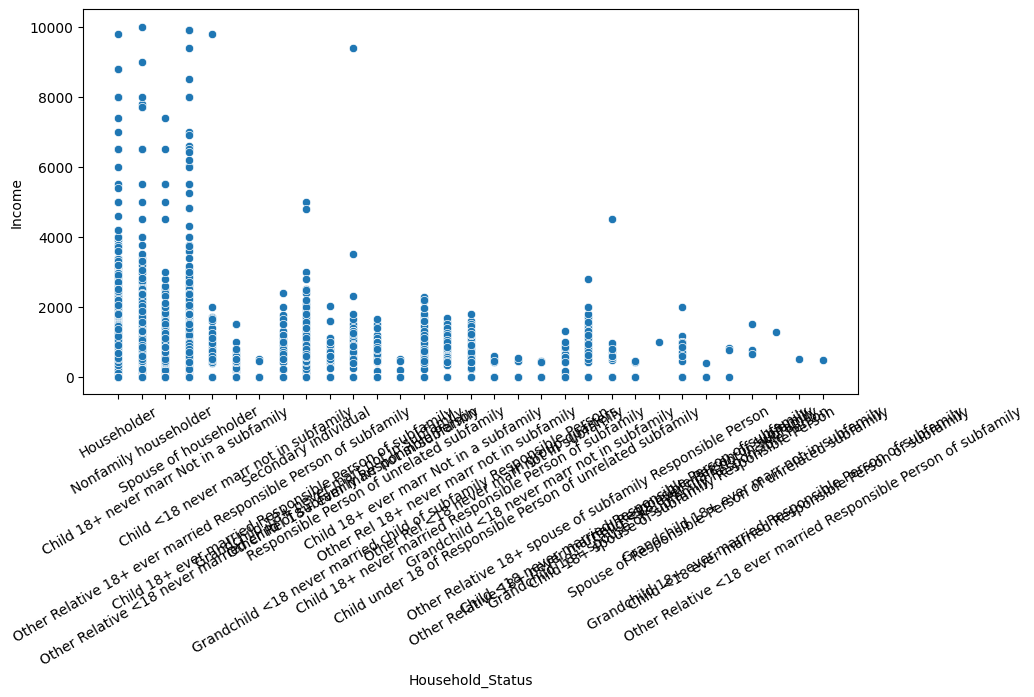

In [28]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 30)
sns.scatterplot(x='Household_Status', y='Income', data = train)

In [ ]:
trainage = train[train['Age']<=17]

## test 결측치 처리

### 결측치 예측

In [21]:
test.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [25]:
train_x_hs = train.drop(columns=['ID', 'Income', 'Household_Status'])
train_y_hs = train['Household_Status']

test_x_hs = test.drop(columns=['ID'])

In [26]:
nan_hs = test_x_hs[test_x_hs.isna().any(axis=1)]
nan_hs

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
2659,20,F,College,Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,Single,...,Other relative of householder,Native,US,US,US,Nonfiler,0,0,0,Under Median


In [28]:
encoding_target_hs = list(train_x_hs.dtypes[train_x_hs.dtypes == "object"].index)
not_encoding_target_hs = list(train_x_hs.dtypes[train_x_hs.dtypes != "object"].index)

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 범주형 변수 선택 (예: Gender, Education_Status, Employment_Status 등)
#encoding_target

# 범주형 변수들을 따로 추출
cat_data_hs = train_x_hs[encoding_target_hs]

# OneHotEncoder 객체 생성
encoder_hs = OneHotEncoder()

# 범주형 변수들을 OneHotEncoder를 사용하여 변환
encoded_data_hs = encoder_hs.fit_transform(cat_data_hs)

# OneHotEncoder의 결과는 희소 행렬(Sparse Matrix)이므로 이를 밀집 행렬(Dense Matrix)로 변환
encoded_data_dense_hs = encoded_data_hs.toarray()

# 밀집 행렬을 데이터프레임으로 변환하여 인코딩된 데이터 확인
encoded_df_hs = pd.DataFrame(encoded_data_dense_hs, columns=encoder_hs.get_feature_names_out(encoding_target_hs))
print(encoded_df_hs.shape)

(20000, 239)


In [30]:
encoded_df_hs.head()

,Gender_F,Gender_M,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Bachelors degree,Education_Status_Children,Education_Status_College,Education_Status_Doctorate degree,Education_Status_Elementary (1-4),Education_Status_Elementary (5-6),...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
not_encoded_df_hs = train_x_hs[not_encoding_target_hs]

In [32]:
train_house = pd.concat([not_encoded_df_hs, encoded_df_hs], axis=1)
train_house.shape

(20000, 244)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
x_train_hs, x_val_hs, y_train_hs, y_val_hs = train_test_split(train_house, train_y_hs, test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier

model_hs_rfc = RandomForestClassifier()
model_hs_rfc.fit(x_train_hs, y_train_hs)

RandomForestClassifier()

In [39]:
y_pred_hs1 = model_hs_rfc.predict(x_val_hs)

In [40]:
accuracy_score(y_pred_hs1, y_val_hs)

0.96625

In [48]:
# 범주형 변수들을 따로 추출
nan_rows_data = nan_hs[encoding_target_hs]

# 저장된 OneHotEncoder를 사용하여 변환
encoded_nan_hs = encoder_hs.transform(nan_rows_data)

# 밀집 행렬을 데이터프레임으로 변환하여 인코딩된 데이터 확인
encoded_nan_df = pd.DataFrame(encoded_nan_hs.toarray(), columns=encoder_hs.get_feature_names_out(encoding_target_hs))

In [52]:
encoded_nan_df

,Gender_F,Gender_M,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Bachelors degree,Education_Status_Children,Education_Status_College,Education_Status_Doctorate degree,Education_Status_Elementary (1-4),Education_Status_Elementary (5-6),...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
not_encoded_nan_df_hs

,Age,Working_Week (Yearly),Gains,Losses,Dividends
2659,20,0,0,0,0


In [56]:
not_encoded_nan_df_hs.shape

(1, 5)

In [67]:
not_encoded_nan_df_hs = nan_hs[not_encoding_target_hs]
nan_house = pd.concat([df, encoded_nan_df], axis=1)
nan_house

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Bachelors degree,...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,20,0,0,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [68]:
y_pred_hs_nan = model_hs_rfc.predict(nan_house)
y_pred_hs_nan

array(['Other Rel 18+ never marr not in subfamily'], dtype=object)

In [65]:
data = {'Age': [20],
        'Working_Week (Yearly)': [0],
        'Gains': [0],
        'Losses': [0],
        'Dividends': [0]}

df = pd.DataFrame(data)
df

,Age,Working_Week (Yearly),Gains,Losses,Dividends
0,20,0,0,0,0


In [3]:
train_x = train.drop(columns=['ID', 'Income'])
train_y = train['Income']

test_x = test.drop(columns=['ID'])

In [4]:
test_x1 = test_x.fillna('Other Rel 18+ never marr not in subfamily')
test_x1.isna().sum()

Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [5]:
encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)
not_encoding_target = list(train_x.dtypes[train_x.dtypes != "object"].index)

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 범주형 변수 선택 (예: Gender, Education_Status, Employment_Status 등)
#encoding_target

# 범주형 변수들을 따로 추출
cat_data = train_x[encoding_target]

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 범주형 변수들을 OneHotEncoder를 사용하여 변환
encoded_data = encoder.fit_transform(cat_data)

# OneHotEncoder의 결과는 희소 행렬(Sparse Matrix)이므로 이를 밀집 행렬(Dense Matrix)로 변환
encoded_data_dense = encoded_data.toarray()

# 밀집 행렬을 데이터프레임으로 변환하여 인코딩된 데이터 확인
encoded_df = pd.DataFrame(encoded_data_dense, columns=encoder.get_feature_names_out(encoding_target))
print(encoded_df.shape)


(20000, 270)


In [7]:
# 범주형 변수들을 따로 추출
test_cat_data = test_x1[encoding_target]

# 저장된 OneHotEncoder를 사용하여 변환
encoded_test_data = encoder.transform(test_cat_data)

# 밀집 행렬을 데이터프레임으로 변환하여 인코딩된 데이터 확인
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out(encoding_target))


In [8]:
encoded_test_df.shape

(10000, 270)

In [9]:
not_encoded_df = train_x[not_encoding_target]

In [10]:
train2 = pd.concat([not_encoded_df, encoded_df], axis=1)

In [11]:
train2.shape

(20000, 275)

In [12]:
age_max = train2.max()['Age']
ww_max = train2.max()['Working_Week (Yearly)']
g_max = train2.max()['Gains']
l_max = train2.max()['Losses']
d_max = train2.max()['Dividends']

In [13]:
train2['Age'] = train2['Age']/age_max
train2['Working_Week (Yearly)'] = train2['Working_Week (Yearly)']/ww_max
train2['Gains'] = train2['Gains']/g_max
train2['Losses'] = train2['Losses']/l_max
train2['Dividends'] = train2['Dividends']/d_max

In [14]:
train2.to_csv('train_scaling.csv', index=False)

In [15]:
train2 = pd.read_csv('C:/Users/hjn/Desktop/소득예측/income-forcast/train_scaling.csv', index_col=None)

In [16]:
train2

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Bachelors degree,...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,0.700000,0.076923,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.411111,1.000000,0.00000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.644444,1.000000,0.03411,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.488889,1.000000,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.411111,1.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.366667,1.000000,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19996,0.222222,0.230769,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19997,0.244444,1.000000,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
19998,0.844444,0.000000,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
not_encoded_test_df = test_x1[not_encoding_target]
test2 = pd.concat([not_encoded_test_df, encoded_test_df], axis=1)

In [18]:
test2

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Bachelors degree,...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,79,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,47,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,18,52,0,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,39,30,0,0,0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,31,52,0,0,0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9996,27,52,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,18,7,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9998,9,0,0,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
test2['Age'] = test2['Age']/age_max
test2['Working_Week (Yearly)'] = test2['Working_Week (Yearly)']/ww_max
test2['Gains'] = test2['Gains']/g_max
test2['Losses'] = test2['Losses']/l_max
test2['Dividends'] = test2['Dividends']/d_max

In [20]:
test2

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Gender_F,Gender_M,Education_Status_Associates degree (Academic),Education_Status_Associates degree (Vocational),Education_Status_Bachelors degree,...,Birth_Country (Mother)_Yugoslavia,Tax_Status_Head of Household (HOH),Tax_Status_Married Filling Jointly both over 65 (MFJ),Tax_Status_Married Filling Jointly both under 65 (MFJ),Tax_Status_Married Filling Jointly one over 65 & one under 65 (MFJ),Tax_Status_Nonfiler,Tax_Status_Single,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,0.877778,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.522222,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.200000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.433333,0.576923,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.066667,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.344444,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9996,0.300000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9997,0.200000,0.134615,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9998,0.100000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
x_train, x_val, y_train, y_val = train_test_split(train2, train_y, test_size=0.2, random_state=42)

In [120]:
import tensorflow as tf

def rmse7(y_true, y_pred):
    y_true_float32 = tf.cast(y_true, tf.float32)
    return (tf.reduce_mean((y_true_float32 - y_pred)**2))**0.5

In [232]:
import tensorflow as tf

X = tf.keras.Input(shape=[275])
H = tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.01))(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)
H = tf.keras.layers.Dropout(0.8)(H)
H = tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.01))(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)
H = tf.keras.layers.Dropout(0.8)(H)
H = tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01))(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)
H = tf.keras.layers.Dropout(0.8)(H)
H = tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01))(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)
H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01))(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)
H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.01))(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)

# 새로운 Dense 레이어 추가
H = tf.keras.layers.Dense(8, kernel_regularizer=tf.keras.regularizers.l2(0.01))(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('relu')(H)
H = tf.keras.layers.Dropout(0.5)(H)

Y = tf.keras.layers.Dense(1)(H)
model3 = tf.keras.Model(X, Y)

model3.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss=rmse7, metrics=['mse', 'mae']) # 회귀 모델

In [233]:
model3.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 275)]             0         
                                                                 
 dense_228 (Dense)           (None, 256)               70656     
                                                                 
 batch_normalization_197 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                                 
 activation_197 (Activation  (None, 256)               0         
 )                                                               
                                                                 
 dropout_145 (Dropout)       (None, 256)               0         
                                                                 
 dense_229 (Dense)           (None, 256)               657

In [234]:
early = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
result = model3.fit(x_train, y_train, epochs=10000000, batch_size=64,
                   validation_split=0.2, # validation_data=(x_val, y_val)
                   callbacks=[early]
)

Epoch 1/10000000
200/200 [==============================] - 3s 5ms/step - loss: 887.7958 - mse: 808889.5000 - mae: 560.6741 - val_loss: 854.9240 - val_mse: 763691.6875 - val_mae: 536.8667
Epoch 2/10000000
200/200 [==============================] - 1s 4ms/step - loss: 881.9182 - mse: 806054.7500 - mae: 559.8558 - val_loss: 854.4224 - val_mse: 763577.9375 - val_mae: 536.8499
Epoch 3/10000000
200/200 [==============================] - 1s 4ms/step - loss: 876.6108 - mse: 800807.5000 - mae: 558.2795 - val_loss: 854.7191 - val_mse: 764075.3750 - val_mae: 536.9100
Epoch 4/10000000
200/200 [==============================] - 1s 4ms/step - loss: 874.6420 - mse: 792894.2500 - mae: 556.0219 - val_loss: 854.3789 - val_mse: 763263.1875 - val_mae: 536.7250
Epoch 5/10000000
200/200 [==============================] - 1s 3ms/step - loss: 867.8480 - mse: 782128.6250 - mae: 552.8005 - val_loss: 853.8022 - val_mse: 762020.3125 - val_mae: 536.4020
Epoch 6/10000000
200/200 [==============================] - 

In [235]:
y_pred3 = model3.predict(x_val)

125/125 [==============================] - 0s 1ms/step


In [ ]:
#tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['mse', 'mae']

In [23]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [40]:
y_pred3 = model1.predict(x_val)

In [152]:
preds5 = model3.predict(test2)

313/313 [==============================] - 1s 1ms/step


In [67]:
y_pred3[y_pred3 < 0] = 0

In [108]:
preds2 = model2.predict(test2)

313/313 [==============================] - 0s 918us/step


In [161]:
rmse = mean_squared_error(y_val, y_pred3)**0.5
print(rmse)

586.2567912929958


In [236]:
# 기본 랜덤포레스트
rmse1 = mean_squared_error(y_val, y_pred3)**0.5
print(rmse1)

625.4835172907913


In [162]:
submission = pd.read_csv('sample_submission.csv')
submission['Income'] = preds5
submission.head(10)

,ID,Income
0,TEST_0000,11.504059
1,TEST_0001,11.347937
2,TEST_0002,462.384277
3,TEST_0003,560.124207
4,TEST_0004,11.625923
5,TEST_0005,667.578186
6,TEST_0006,458.559906
7,TEST_0007,11.551857
8,TEST_0008,11.543084
9,TEST_0009,1134.883667


In [163]:
submission.loc[submission['Income'] < 0, 'Income'] = 0

In [164]:
submission

,ID,Income
0,TEST_0000,11.504059
1,TEST_0001,11.347937
2,TEST_0002,462.384277
3,TEST_0003,560.124207
4,TEST_0004,11.625923
...,...,...
9995,TEST_9995,953.810852
9996,TEST_9996,663.668457
9997,TEST_9997,483.561859
9998,TEST_9998,11.549128


In [165]:
submission.to_csv('baseline_submission13.csv', index=False)

In [ ]:
# 데이터 정규화
# dropout